<a href="https://colab.research.google.com/github/archita19/Stock_Market_Predicton_TM/blob/main/SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade pandas
%pip install --upgrade pandas-datareader

In [ ]:
# importing libraries
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# libraries needed for prediction
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# get the stock quote from yahoo finance for Tata Motors
df = pdr.DataReader('TATAMOTORS.NS', data_source = 'yahoo', start = '2018-01-01', end = '2022-01-01')
df

High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-01  436.399994  422.250000  430.950012  424.450012   6807536   
2018-01-02  440.850006  422.000000  428.850006  439.299988  15331261   
2018-01-03  441.399994  431.950012  440.399994  433.899994   9794953   
2018-01-04  433.299988  425.750000  430.000000  429.950012   8395377   
2018-01-05  436.350006  429.799988  431.250000  431.600006   7021611   
...                ...         ...         ...         ...       ...   
2021-12-27  472.450012  460.100006  465.700012  471.149994  12557565   
2021-12-28  482.799988  472.649994  475.200012  480.200012  22860916   
2021-12-29  481.600006  474.250000  478.750000  476.000000  10263884   
2021-12-30  476.399994  468.600006  472.549988  470.399994  11923961   
2021-12-31  483.600006  471.850006  472.700012  482.399994  15541446   

             Adj Close  
Date                    
2018-01-01  424.450012  
2018-01-02  439.299988  
2018-01-03  433.899994  
2018-01-04  429.950012  
2018-01-05  431.600006  
...                ...  
2021-12-27  471.149994  
2021-12-28  480.200012  
2021-12-29  476.000000  
2021-12-30  470.399994  
2021-12-31  482.399994  

[988 rows x 6 columns]

In [ ]:
df.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2021-12-27  472.450012  460.100006  465.700012  471.149994  12557565   
2021-12-28  482.799988  472.649994  475.200012  480.200012  22860916   
2021-12-29  481.600006  474.250000  478.750000  476.000000  10263884   
2021-12-30  476.399994  468.600006  472.549988  470.399994  11923961   
2021-12-31  483.600006  471.850006  472.700012  482.399994  15541446   

             Adj Close  
Date                    
2021-12-27  471.149994  
2021-12-28  480.200012  
2021-12-29  476.000000  
2021-12-30  470.399994  
2021-12-31  482.399994

In [ ]:
# get the stock quote from yahoo finance for Mahindra and Mahindra Motors
df2 = pdr.DataReader('M&M.NS', data_source = 'yahoo', start = '2018-01-01', end = '2022-01-01')
df2

High         Low        Open       Close     Volume  \
Date                                                                    
2018-01-01  758.900024  743.000000  751.000000  744.650024  2476302.0   
2018-01-02  758.000000  746.299988  754.000000  752.900024  3020597.0   
2018-01-03  759.000000  750.000000  755.900024  754.900024  2256643.0   
2018-01-04  761.000000  750.500000  761.000000  756.000000  1663380.0   
2018-01-05  758.500000  753.599976  756.000000  756.349976  1255982.0   
...                ...         ...         ...         ...        ...   
2021-12-27  823.150024  806.950012  808.000000  818.549988  1492196.0   
2021-12-28  840.000000  819.049988  824.000000  838.700012  1677680.0   
2021-12-29  843.450012  830.849976  843.450012  832.700012  1575343.0   
2021-12-30  843.000000  827.150024  843.000000  829.299988  1874659.0   
2021-12-31  845.000000  830.200012  834.799988  837.150024  1528983.0   

             Adj Close  
Date                    
2018-01-01  717.305542  
2018-01-02  725.252563  
2018-01-03  727.179199  
2018-01-04  728.238708  
2018-01-05  728.575928  
...                ...  
2021-12-27  818.549988  
2021-12-28  838.700012  
2021-12-29  832.700012  
2021-12-30  829.299988  
2021-12-31  837.150024  

[988 rows x 6 columns]

In [ ]:
# get number of rows and columns
df.shape

(988, 6)

In [ ]:
# get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2018-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       988 non-null    float64
 1   Low        988 non-null    float64
 2   Open       988 non-null    float64
 3   Close      988 non-null    float64
 4   Volume     988 non-null    int64  
 5   Adj Close  988 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 54.0 KB


In [ ]:
# get description of the data in the dataframe
df.describe()

High         Low        Open       Close        Volume  \
count  988.000000  988.000000  988.000000  988.000000  9.880000e+02   
mean   235.998735  227.499798  231.965536  231.405820  4.182239e+07   
std    109.107557  106.198923  107.778899  107.455355  3.963012e+07   
min     66.900002   63.500000   66.500000   65.300003  3.820313e+06   
25%    156.924995  150.262505  152.987499  151.837505  1.531184e+07   
50%    188.849998  183.224998  186.000000  185.525002  3.029523e+07   
75%    313.824989  305.025002  309.287506  308.812492  5.558624e+07   
max    536.700012  520.250000  531.450012  530.150024  3.905778e+08   

        Adj Close  
count  988.000000  
mean   231.405820  
std    107.455355  
min     65.300003  
25%    151.837505  
50%    185.525002  
75%    308.812492  
max    530.150024

In [ ]:
# checking for null values
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Text(0, 0.5, 'Closing Price (in Rs.)')

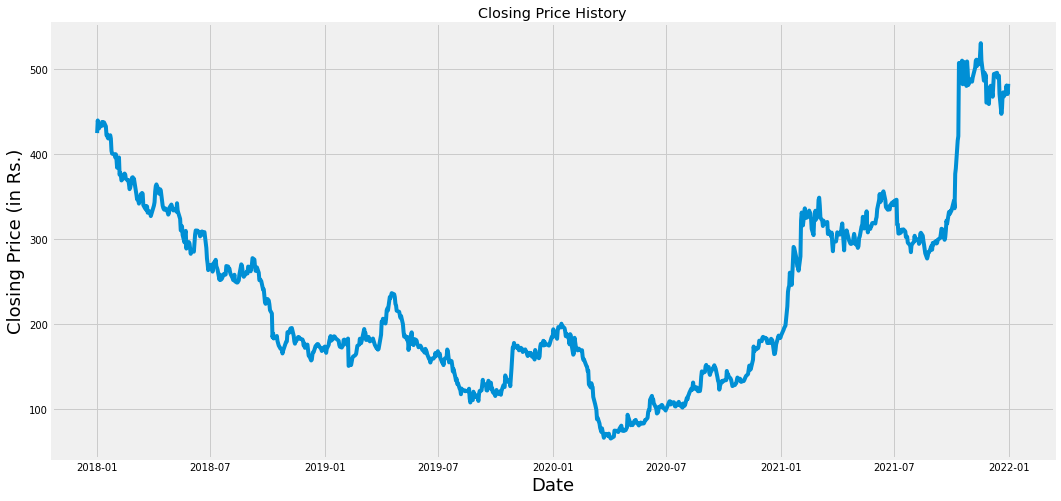

In [ ]:
# visualizing closing price in the dataset
plt.figure(figsize = (16, 8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price (in Rs.)', fontsize = 18)

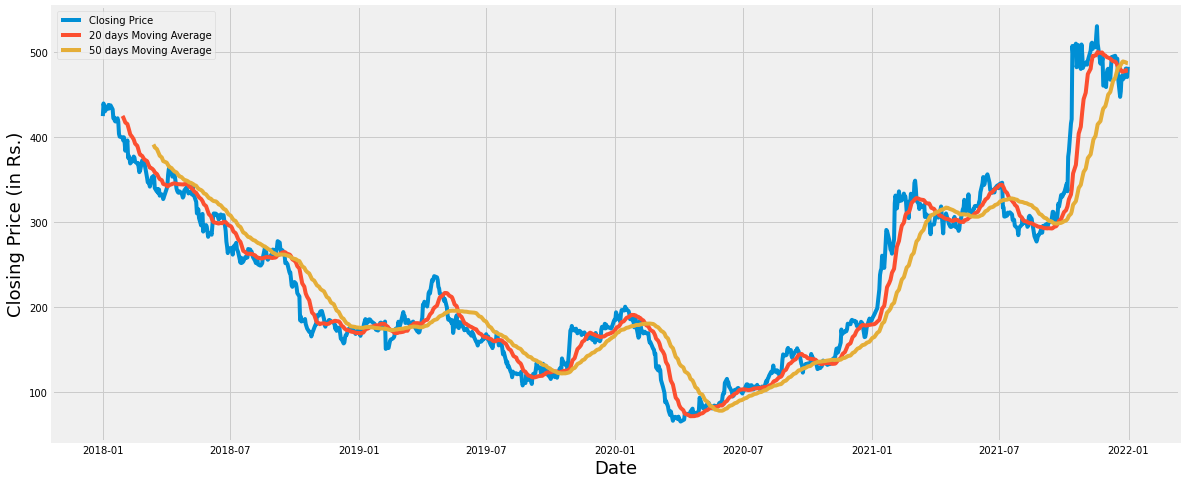

In [ ]:
# visualizing moving average
plt.figure(figsize = (18, 8))
plt.plot(df['Close'], label = 'Closing Price')
plt.plot(df['Close'].rolling(20).mean(), label = '20 days Moving Average')
plt.plot(df['Close'].rolling(50).mean(), label = '50 days Moving Average')
# plt.plot(df['Close'].rolling(100).mean(), label = '100 days Moving Average')
# plt.plot(df['Close'].ewm(com = 0.4).mean(), label = 'Exponential Moving Average')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price (in Rs.)', fontsize = 18)
plt.legend()

In [ ]:
%pip install mplfinance

Candlestick

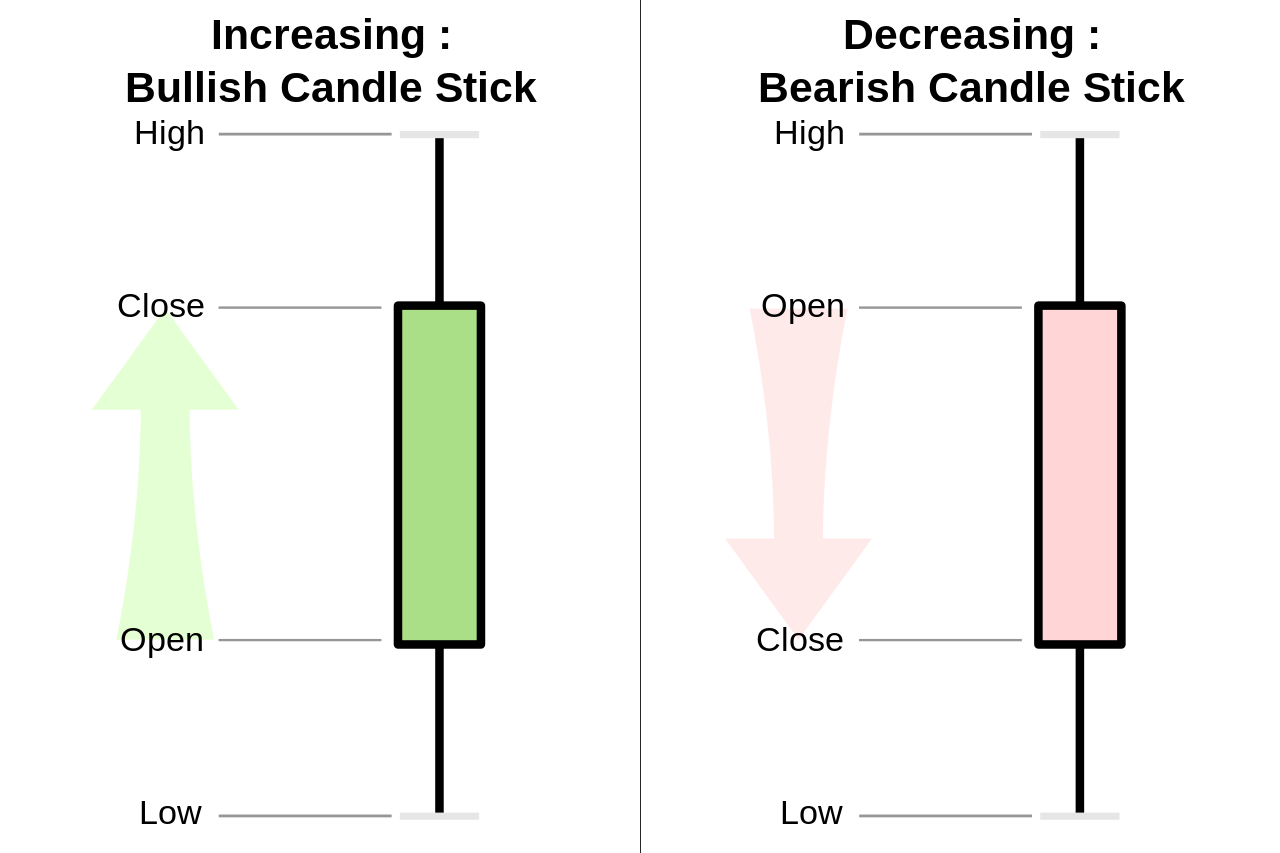

In [ ]:
import mplfinance as mpf

# extracting data from the month Nov 2021 onwards
data = df.loc['2021-11':] 

# Converting the dates from string to datetime format
data.index = pd.to_datetime(data.index)

# plotting candlestick chart
mpf.plot(
    data,
    type = "candle", 
    mav = (10),   
    style = "yahoo",
    volume = True,
    figsize = (16, 8)
)

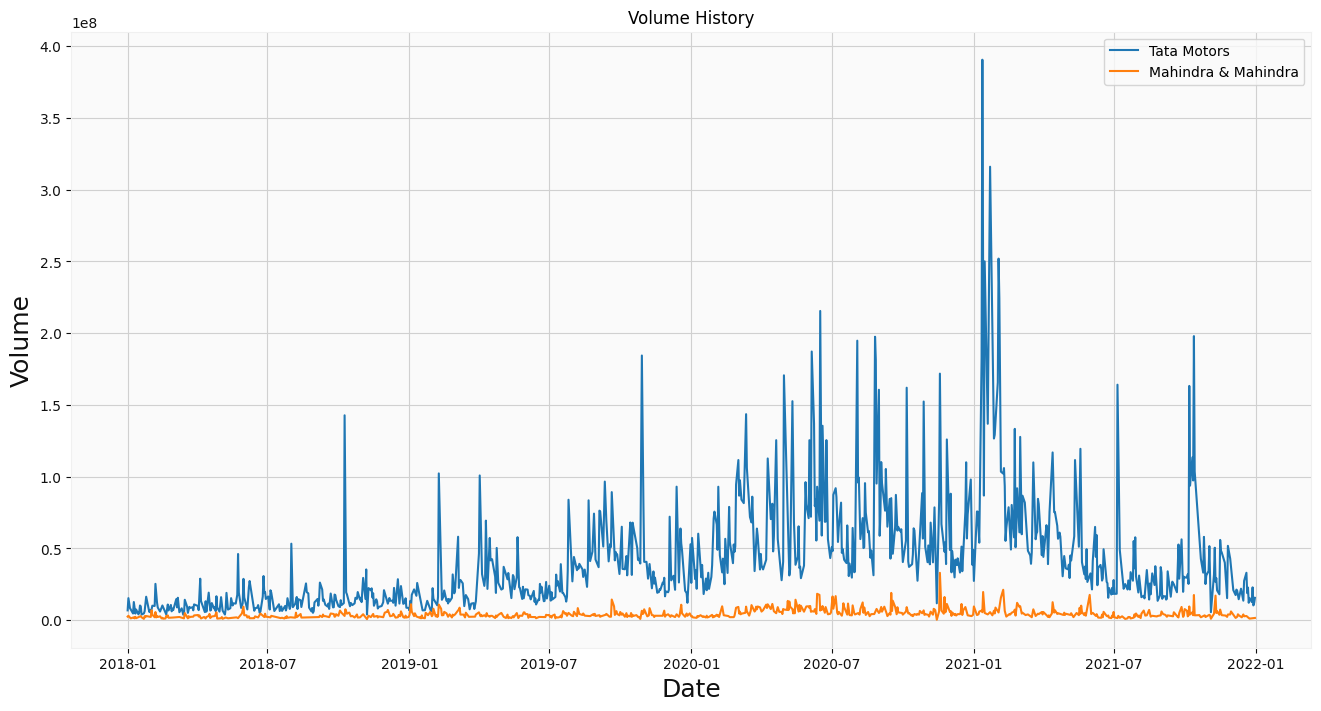

In [ ]:
# visualizing volume in the dataset
plt.figure(figsize = (16, 8))
plt.title('Volume History')
plt.plot(df['Volume'], label = 'Tata Motors')
plt.plot(df2['Volume'], label = 'Mahindra & Mahindra')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Volume', fontsize = 18)
plt.legend()

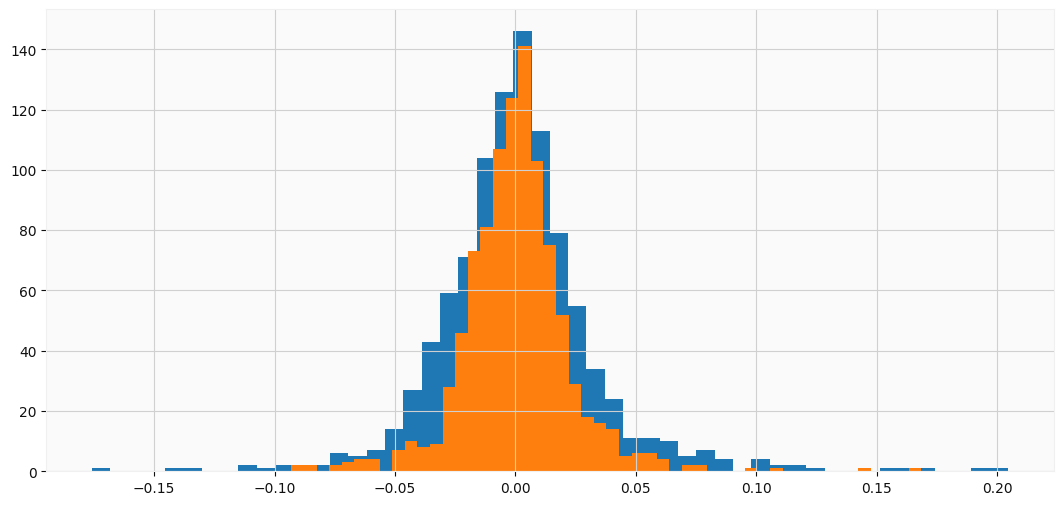

In [ ]:
# find the percent change for each day for TM and M&M - 
df['Daily Returns'] = df['Close'].pct_change()
df2['Daily Returns'] = df2['Close'].pct_change()
df['Daily Returns'].hist(bins = 50, figsize = (13, 6))
df2['Daily Returns'].hist(bins = 50, figsize = (13, 6))

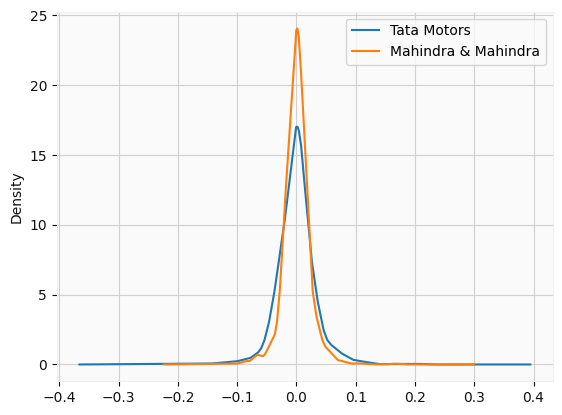

In [ ]:
# kde - kernel density estimation - the more wider the more volatile
df['Daily Returns'].plot(kind = 'kde', label = 'Tata Motors')
df2['Daily Returns'].plot(kind = 'kde', label = 'Mahindra & Mahindra')
plt.legend()

In [ ]:
!pip install talib-binary

In [ ]:
import talib as tb

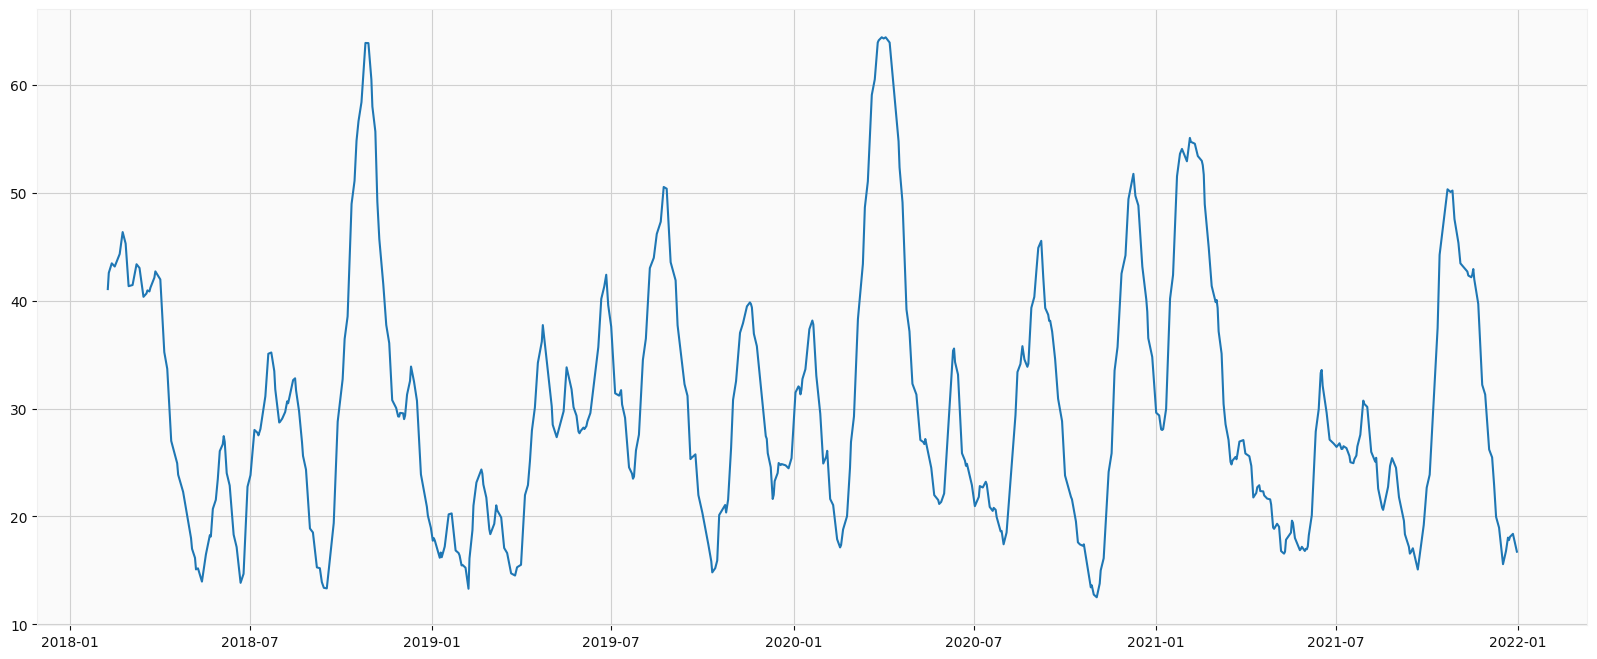

In [ ]:
# ADX - Average Directional Movement Index (momentum indicator)
real = tb.ADX(df['High'], df['Low'], df['Close'], timeperiod = 14)
plt.figure(figsize = (20, 8))
plt.plot(real)

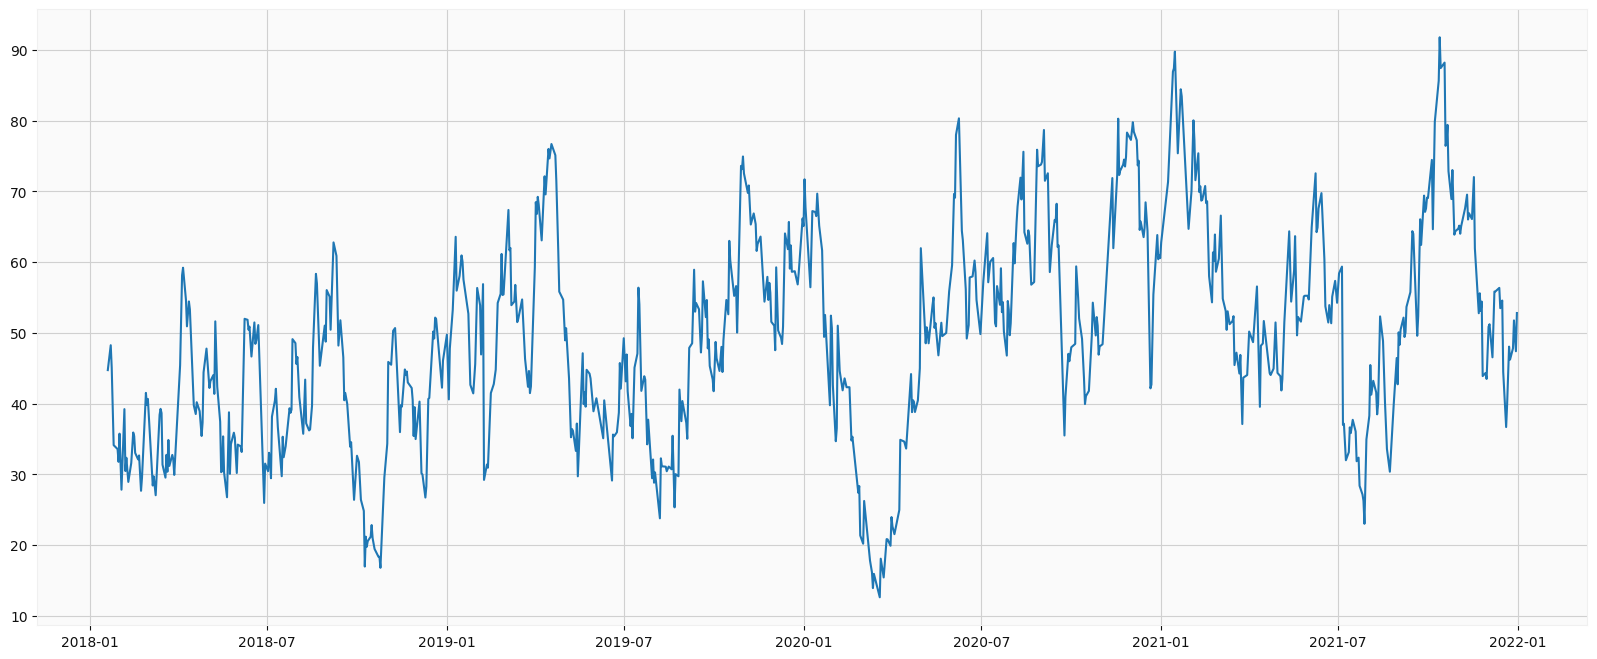

In [ ]:
# RSI - Relative Strength Index
real = tb.RSI(df['Close'], timeperiod = 14)
plt.figure(figsize = (20, 8))
plt.plot(real)

In [ ]:
# Create a new dataframe with only the Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .70 ))

training_data_len

692

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    # if i<= 61:
    #     print(x_train)
    #     print(y_train)
    #     print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

632/632 [==============================] - 46s 67ms/step - loss: 0.0016


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

17.823302488206803

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


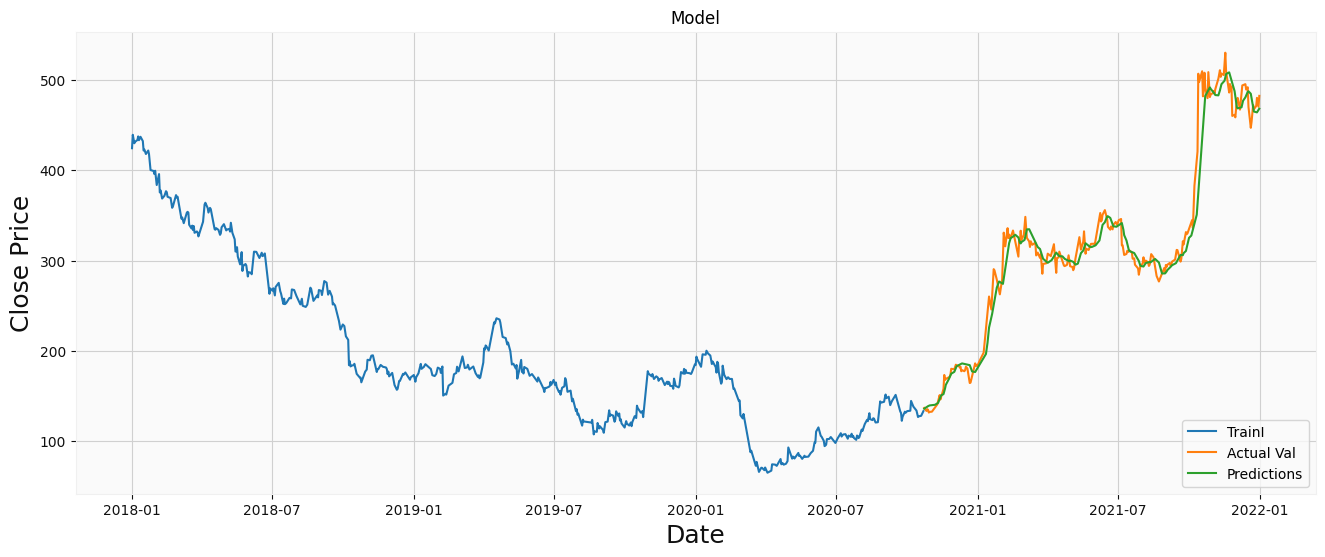

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['TrainI', 'Actual Val', 'Predictions'], loc='lower right')

In [ ]:
# linear regression
data = df.reset_index()
x = np.array(data.index).reshape(-1, 1)
y = data['Close']

In [ ]:
from sklearn import linear_model
linreg = linear_model.LinearRegression().fit(x, y)

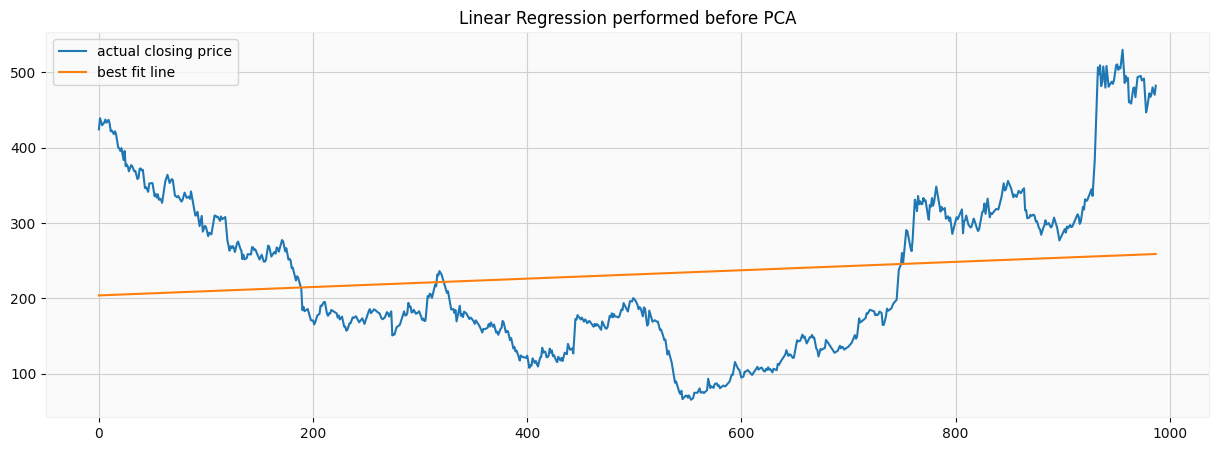

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'], label = "actual closing price")
plt.plot(data.index, linreg.predict(x), label = "best fit line")
plt.title("Linear Regression performed before PCA")
plt.legend()
# we can see that while the regression line is not exactly accurate in exact closing price values, it does capture the general trend of the data.

In [ ]:
print('R^2:', linreg.score(x, y))

R^2: 0.021868747834850488


In [ ]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x)
poly.fit(X_poly, y)

from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression().fit(X_poly, y)

Text(0.5, 1.0, 'Polynomial Regression')

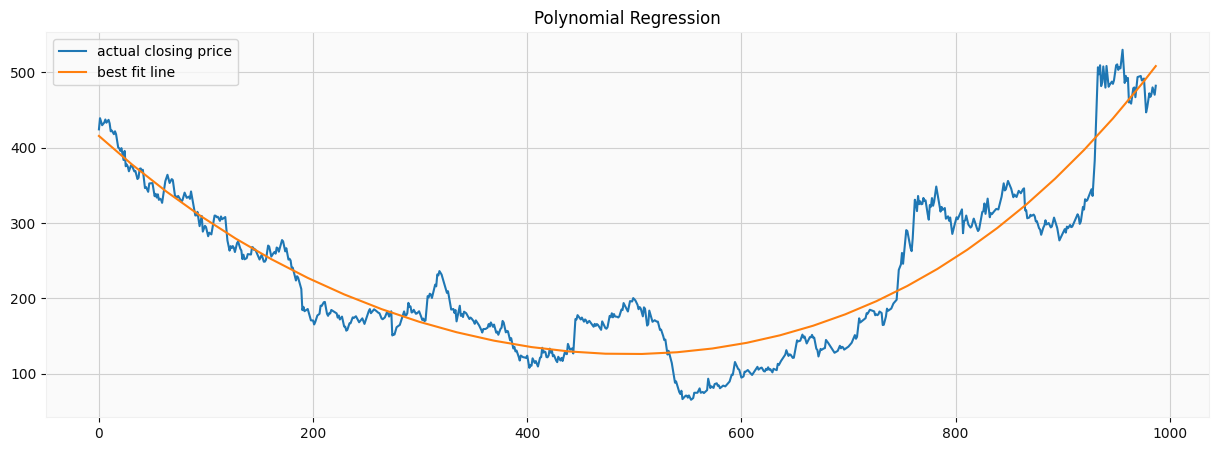

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'], label = "actual closing price")
plt.plot(x, linreg2.predict(poly.fit_transform(x)), label = "best fit line")
plt.legend()
plt.title("Polynomial Regression")

In [ ]:
# PCA
df_pca = pdr.DataReader('TATAMOTORS.NS', data_source = 'yahoo', start = '2018-01-01', end = '2022-01-01')
df_pca.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-01  436.399994  422.250000  430.950012  424.450012   6807536   
2018-01-02  440.850006  422.000000  428.850006  439.299988  15331261   
2018-01-03  441.399994  431.950012  440.399994  433.899994   9794953   
2018-01-04  433.299988  425.750000  430.000000  429.950012   8395377   
2018-01-05  436.350006  429.799988  431.250000  431.600006   7021611   

             Adj Close  
Date                    
2018-01-01  424.450012  
2018-01-02  439.299988  
2018-01-03  433.899994  
2018-01-04  429.950012  
2018-01-05  431.600006

In [ ]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_pca)
scaled_data = scaler.transform(df_pca)
scaled_data

array([[ 1.83766147,  1.8347534 ,  1.84716355,  1.79741587, -0.88398883,
         1.79741587],
       [ 1.87846769,  1.83239814,  1.82766929,  1.93568256, -0.66879793,
         1.93568256],
       [ 1.88351102,  1.9261378 ,  1.93488729,  1.88540374, -0.80856817,
         1.88540374],
       ...,
       [ 2.25214151,  2.32464854,  2.29088859,  2.27739284, -0.79672949,
         2.27739284],
       [ 2.20445787,  2.2714196 ,  2.23333417,  2.22525172, -0.754819  ,
         2.22525172],
       [ 2.27048133,  2.30203805,  2.23472684,  2.33698256, -0.66349158,
         2.33698256]])

In [ ]:
# performing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(988, 2)

In [ ]:
x_pca

array([[ 4.14892584, -0.42725173],
       [ 4.25640032, -0.19688906],
       [ 4.31878321, -0.33310704],
       ...,
       [ 5.16512112, -0.22704489],
       [ 5.04369514, -0.19829613],
       [ 5.17645525, -0.09022926]])

Text(0.5, 1.0, '2 Component PCA')

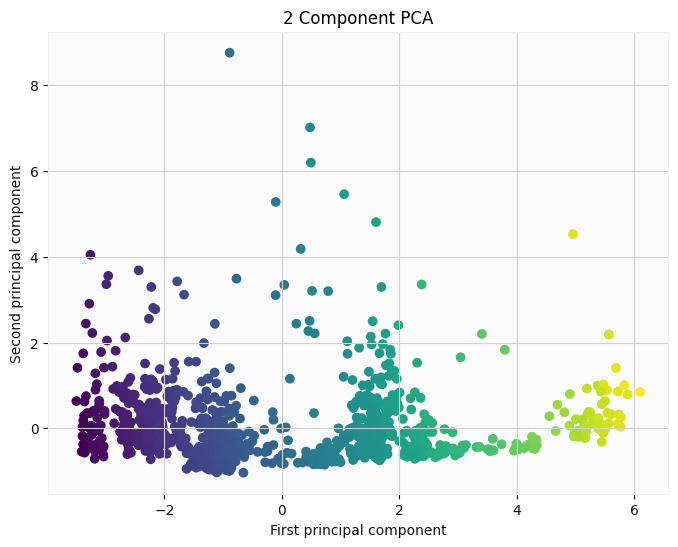

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_pca['Close'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('2 Component PCA')

In [ ]:
pca.explained_variance_ratio_
# 1st and 2nd principal component contains 84% and 15% of the variance. Together the 2 components contains 99% of information

array([0.84111362, 0.15837111])

In [ ]:
# linear regression after performing PCA
data_pca = df_pca.reset_index()
y_pca = data_pca['Close']
y_pca

0      424.450012
1      439.299988
2      433.899994
3      429.950012
4      431.600006
          ...    
983    471.149994
984    480.200012
985    476.000000
986    470.399994
987    482.399994
Name: Close, Length: 988, dtype: float64

In [ ]:
from sklearn import linear_model
linreg3 = linear_model.LinearRegression().fit(x_pca, y_pca)

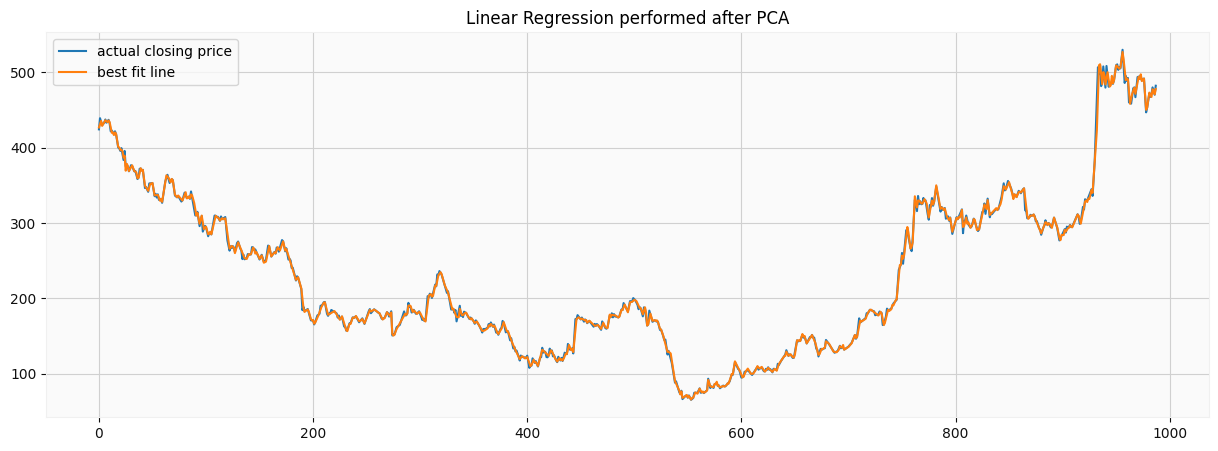

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_pca['Close'], label = "actual closing price")
plt.plot(data.index, linreg3.predict(x_pca), label = "best fit line")
plt.title("Linear Regression performed after PCA")
plt.legend()

# overfitting 

In [ ]:
# tensorflow validation
!pip install tensorflow_data_validation

  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 0.14.1 which is incompatible.


In [ ]:
import tensorflow_data_validation as tfdv
stats = tfdv.generate_statistics_from_csv(data_location = '/content/TATAMOTORS.NS.csv')
tfdv.visualize_statistics(stats)

In [ ]:
# pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-data-validation 1.7.0 requires joblib<0.15,>=0.12, but you have joblib 1.1.0 which is incompatible.


In [ ]:
!pip install MarkupSafe==2.0.1

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("sma_output.html")